In [1]:
import matplotlib.pyplot as plt
import numpy as np
from alignment_functions.gal_multiplets import *

### Catalog
This test catalog was made with large halos from AbacusSummit (ph017_z0.80) and contains only x, y, z positions in comoving Mpc/h

In [2]:
sample = Table.read('example_catalogs/abacus_comoving-points.fits')
sample.columns

<TableColumns names=('x_L2com')>

## Measuring Alignment

This is very high-level function which takes in only 3D points and returns multiplet alignment measurements, generating its own set of randoms. 

In [3]:
# finding and measuring the alignment of groups in the example catalog. This may take a few minutes. 
alignment_result = get_MIA_from3D(sample['x_L2com'], save_directory='example_output', print_info=True, sim_label='example', periodic_boundary=True, transverse_max = 1, los_max=6, max_rp=100, n_batches = 10)

Calculating MIA for 1279967 points
Finding multiplets
Found 54421 multiplets averange number of members: 2.081366
working on batch 0 sim: example
Results saved to  example_output/MIA_16bins_5-100_10batches_example.fits


## Looking at output

In [4]:
# reading in previously saved results
#alignment_result = Table.read('example_output/alignment_output.fits')

In [5]:
alignment_result

R_bin_min,R_bin_max,relAng_plot,relAng_plot_e,pimax
float64,float64,float64,float64,float64
5.000000000000001,6.105276500337841,0.09632150141989496,0.004509376387217908,11.701758833445947
6.105276500337841,7.4548802291154965,0.08602672777171169,0.005653539698692473,12.520052243151113
7.4548802291154965,9.102821015130404,0.07496362510809626,0.002269850673347412,13.519233748081966
9.102821015130404,11.11504784609142,0.06183596918536296,0.0022611682896730503,14.739289620407273
11.11504784609142,13.572088082974531,0.050267816365293025,0.0019485917261456397,16.22904530968865
13.572088082974531,16.572270086699938,0.04016854325953108,0.002363473135918298,18.04811938989149
16.572270086699938,20.23565822351618,0.03138425675063419,0.0018559171296362118,20.269309436738702
20.23565822351618,24.708857724180305,0.02336639243529186,0.0008417078380951366,22.98150531589883
24.708857724180305,30.170881682725824,0.01906946675012749,0.001140694138676583,26.293246468968707


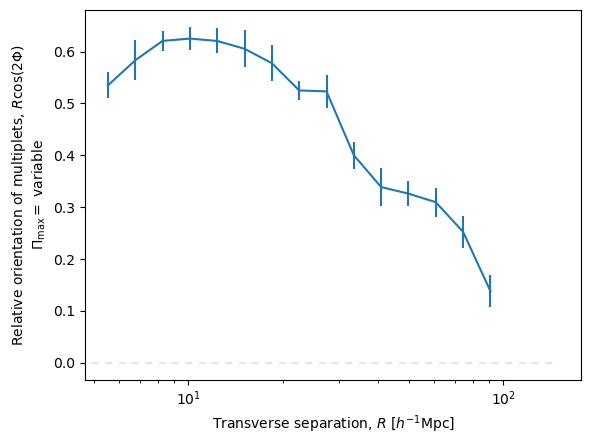

In [6]:
bin_centers = (alignment_result['R_bin_min'] + alignment_result['R_bin_max'])/2
plt.errorbar(bin_centers, bin_centers * alignment_result['relAng_plot'], yerr=bin_centers*alignment_result['relAng_plot_e'])

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of multiplets, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = $ variable')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16));